In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [2]:
import numpy as np
import pandas as pd
import os
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree
from xgboost import plot_importance
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
import preprocessing
from tqdm import tqdm
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from skimage.transform import resize
from collections import Counter
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # Inception
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import xgboost as xgb
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
train = pd.read_json("/kaggle/input/facebook-hateful-meme-dataset/data/train.jsonl",lines=True)
test = pd.read_json("/kaggle/input/facebook-hateful-meme-dataset/data/test.jsonl",lines=True)
val = pd.read_json("/kaggle/input/facebook-hateful-meme-dataset/data/dev.jsonl",lines=True)
train.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [4]:
train.shape, test.shape, val.shape

((8500, 4), (1000, 3), (500, 4))

In [5]:
df = pd.concat([train, val])
df.shape

(9000, 4)

In [15]:
df = df.reset_index()

In [7]:
df.groupby(['label']).count()

,id,img,text
label,,,
0,5700,5700,5700
1,3300,3300,3300


In [8]:
w , h= 64,64
final_class = 2 # 1 for meningioma, 2 for glioma, 3 for pituitary tumor
w,h,final_class

(64, 64, 2)

In [17]:
from tqdm import tqdm
import cv2
X = []
XnormBL = []
y = []
DIR = '/kaggle/input/facebook-hateful-meme-dataset/data/'
for location in tqdm(df.index):
    img = df.loc[location,'img']
    img = cv2.imread(DIR + img) 
    if img is not None:
        img = cv2.resize(img, (w,h), interpolation = cv2.INTER_AREA)
        X.append(img)
        img_normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        img1 = cv2.bilateralFilter(img_normalized, 5, 10, 10)
        XnormBL.append(img1)
        y.append(df.loc[location,'label'])

X = np.array(X)
XnormBL = np.array(XnormBL)
y = np.array(y)
('Original Image',X.shape), ('Normalised and Bilateral filtered images',XnormBL.shape), ('Y True or Ground Truths',y.shape)

100%|██████████| 9000/9000 [02:44<00:00, 54.88it/s]


ValueError: cannot reshape array of size 110592000 into shape (9000,4096)

In [19]:

('Original Image',X.shape), ('Normalised and Bilateral filtered images',XnormBL.shape), ('Y True or Ground Truths',y.shape)

(('Original Image', (9000, 64, 64, 3)),
 ('Normalised and Bilateral filtered images', (9000, 64, 64, 3)),
 ('Y True or Ground Truths', (9000,)))

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.layers import *
def FEX(name):
    input1 = Input(shape=(X.shape[1],X.shape[2],3,))
    FE_sigma_X = name(input_shape=(64,64,3), weights='imagenet', include_top=False)(input1)
    FE_sigma_X_OP1 = Flatten()(FE_sigma_X)
    FE_sigma_X_OP1 = Dense(512)(FE_sigma_X_OP1)
    model_FV = Model(inputs=input1,outputs=FE_sigma_X_OP1)
    return model_FV
def extr(name,X):
    model_FV = FEX(name)
    tf.keras.utils.plot_model(model_FV, show_shapes=True)
    X_OP = model_FV.predict(X)
    dfFE = pd.DataFrame(X_OP)
    print(X_OP.shape,y.shape)
    return X_OP,model_FV


# Resnet

In [30]:
name = ResNet50
FeXr,model_FVr = extr(name, X)
np.save('Fex_merger_org.npy',FeX)
FeXr.shape,y.shape

282/282 [==============================] - 4s 9ms/step
(9000, 512) (9000,)


((9000, 512), (9000,))

# DenseNet121

In [31]:
name = DenseNet121
FeXd,model_FVd = extr(name, X)
np.save('Fex_merger_org.npy',FeX)
FeXd.shape,y.shape

282/282 [==============================] - 7s 16ms/step
(9000, 512) (9000,)


((9000, 512), (9000,))

In [38]:
import tensorflow as tf
mod = tf.keras.applications.ConvNeXtBase(input_shape=(64,64,3), weights='imagenet', include_top=False)


In [39]:
def FEX():
    input1 = Input(shape=(X.shape[1],X.shape[2],3,))
    FE_sigma_X = tf.keras.applications.ConvNeXtBase(input_shape=(64,64,3), weights='imagenet', include_top=False)(input1)
    FE_sigma_X_OP1 = Flatten()(FE_sigma_X)
    FE_sigma_X_OP1 = Dense(512)(FE_sigma_X_OP1)
    model_FV = Model(inputs=input1,outputs=FE_sigma_X_OP1)
    return model_FV
def extr(X):
    model_FV = FEX()
    X_OP = model_FV.predict(X)
    dfFE = pd.DataFrame(X_OP)
    print(X_OP.shape,y.shape)
    return X_OP,model_FV

FeXc,model_FVc = extr( X)
np.save('Fex_merger_org.npy',FeX)


282/282 [==============================] - 28s 73ms/step
(9000, 512) (9000,)


NameError: name 'yc' is not defined

In [41]:
FeXc.shape, FeXd.shape, FeXr.shape, y.shape

((9000, 512), (9000, 512), (9000, 512), (9000,))

# Modelling

In [42]:
from sklearn.preprocessing import OneHotEncoder
Y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)
Y = enc.transform(Y).toarray()
Y.shape

(9000, 2)

In [45]:
from tensorflow.keras.layers import LSTM,add
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout,MaxPool1D
from tensorflow.keras.layers import LSTM,add
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten,RNN
import tensorflow as tf
from tensorflow.keras.layers import Input

def create_model():
    inps1 = Input(shape = (512,), dtype='int64')
    inps2 = Input(shape = (512,), dtype='int64')
    inps3 = Input(shape = (512,), dtype='int64')
    dense_1 = Dense(2048,activation='relu'  )(inps1)
    dense_1 = Dense(1024,activation='relu'  )(dense_1)
    dense_1 = Dense(1024,activation='relu'  )(dense_1)
    dense_1 = Dense(512,activation='relu'  )(dense_1)
    
    dense_2 = Dense(2048,activation='relu'  )(inps2)
    dense_2 = Dense(1024,activation='relu'  )(dense_2)
    dense_2 = Dense(1024,activation='relu'  )(dense_2)
    dense_2 = Dense(512,activation='relu'  )(dense_2)
    
    dense_3 = Dense(2048,activation='relu'  )(inps3)
    dense_3 = Dense(1024,activation='relu'  )(dense_3)
    dense_3 = Dense(1024,activation='relu'  )(dense_3)
    dense_3 = Dense(512,activation='relu'  )(dense_3)
    
    concat =tf.keras.layers.Concatenate()([dense_3, dense_2, dense_1])
    dense_1 = Dense(512,activation='relu' )(concat)
    dense_1 = Dense(256,activation='relu' )(dense_1)
    dense_1 = Dense(256,activation='relu' )(dense_1)
    drOPout= Dropout(0.5)(dense_1)
    pred = Dense(2, activation='sigmoid')(drOPout)
    model = tf.keras.Model(inputs=[inps1,inps2,inps3], outputs=pred)
    return model
model = create_model()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 2048)         1050624     ['input_15[0][0]']               
                                                                                            

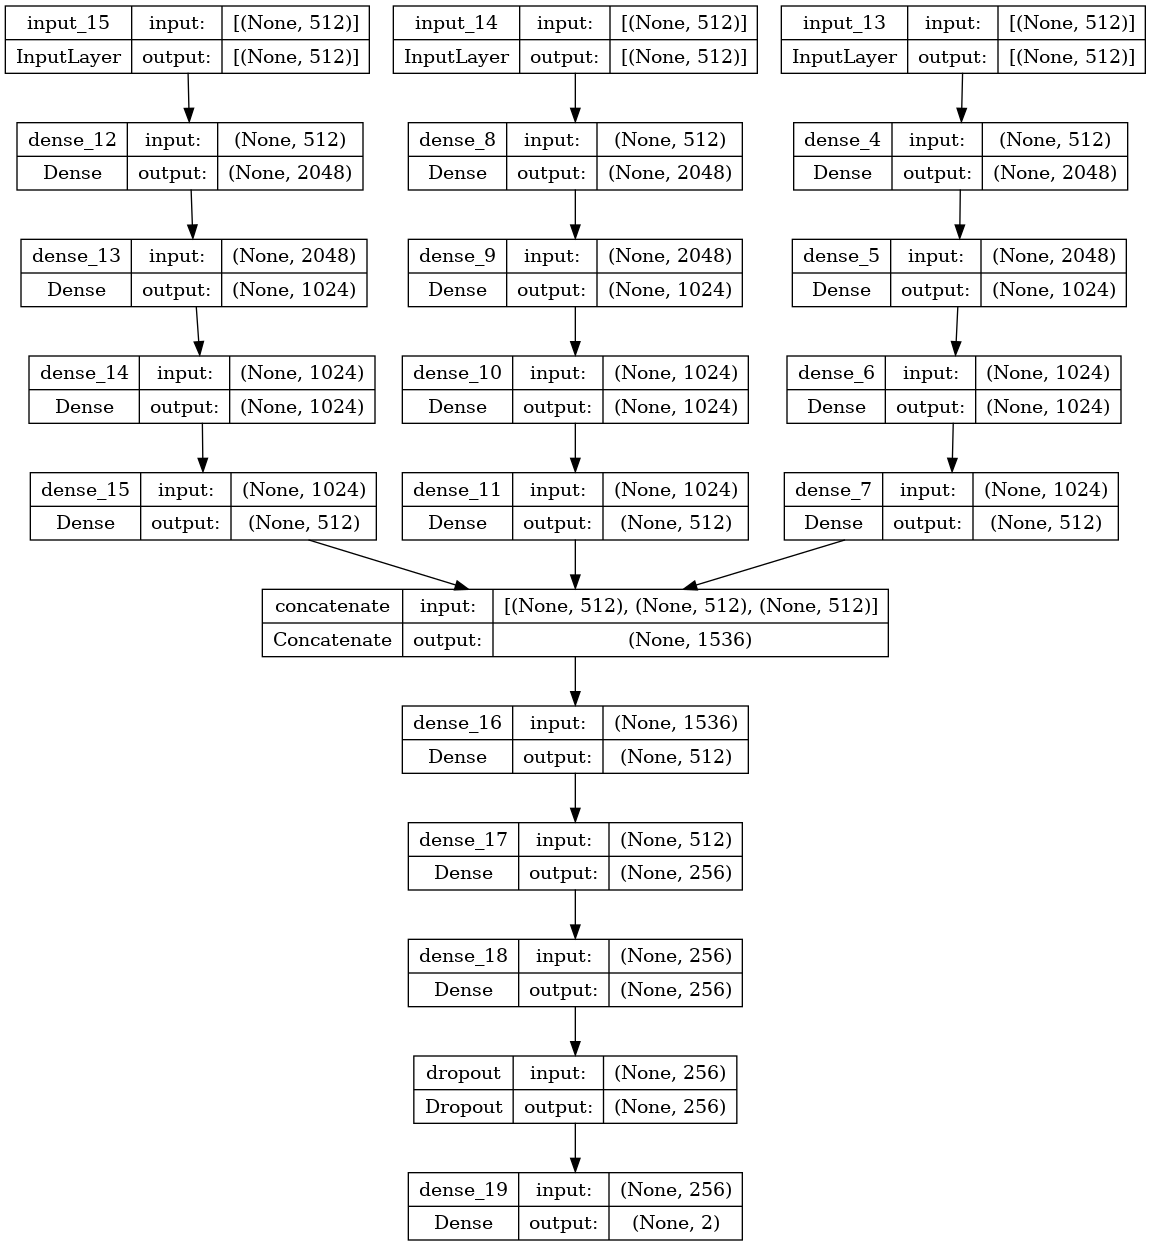

In [46]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

In [47]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f,X_train_x, X_test_x,X_train_b, X_test_b, y_train, y_test = train_test_split(FeXc,FeXd, FeXr,Y, random_state=42, test_size=0.2)
print('Train data    :'+str(X_train_f.shape), X_train_b.shape, str(X_train_x.shape))
print('Test data     :'+str(X_test_f.shape), str(X_test_b.shape), str(X_test_x.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))

Train data    :(7200, 512) (7200, 512) (7200, 512)
Test data     :(1800, 512) (1800, 512) (1800, 512)
Train Output  :(7200, 2)
Test Output   :(1800, 2)


In [49]:
METRICS = [
               'accuracy'
        ]  
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                filepath='./',
                save_weights_only=True,
                monitor='accuracy',
                mode='max',
                save_best_only=True)
model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=METRICS
            )
history = model.fit([FeXc,FeXd, FeXr], Y,
                            epochs=20,
                            verbose=1,
                            shuffle = True,
                            validation_data=([X_test_f,X_test_x,X_test_b],y_test),
                           callbacks=[model_checkpoint_callback])

Epoch 1/20
282/282 [==============================] - 8s 11ms/step - loss: 0.0247 - accuracy: 0.9949 - val_loss: 0.0096 - val_accuracy: 0.9956
Epoch 2/20
282/282 [==============================] - 2s 9ms/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 0.0092 - val_accuracy: 0.9983
Epoch 3/20
282/282 [==============================] - 3s 9ms/step - loss: 0.0223 - accuracy: 0.9950 - val_loss: 0.0215 - val_accuracy: 0.9944
Epoch 4/20
282/282 [==============================] - 2s 8ms/step - loss: 0.0222 - accuracy: 0.9942 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/20
282/282 [==============================] - 3s 9ms/step - loss: 0.0175 - accuracy: 0.9959 - val_loss: 0.0130 - val_accuracy: 0.9961
Epoch 6/20
282/282 [==============================] - 2s 7ms/step - loss: 0.0195 - accuracy: 0.9948 - val_loss: 0.0249 - val_accuracy: 0.9944
Epoch 7/20
282/282 [==============================] - 2s 8ms/step - loss: 0.0200 - accuracy: 0.9953 - val_loss: 0.0084 - val_accuracy: 0.9972
Epoch

In [50]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
name ='Model_CB256'
with open(name+".json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(name+".h5")
import pandas as pd
json_file = open('./'+name+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('./'+name+'.h5')
print("Loaded model from disk")
hist_df = pd.DataFrame(history.history) 
hist_df.to_csv(name+'.csv',index = False)
hist_df.tail()

Loaded model from disk


,loss,accuracy,val_loss,val_accuracy
15,0.020095,0.996333,0.641896,0.918333
16,0.030790,0.991778,0.025135,0.991667
17,0.009019,0.998444,0.002637,0.999444
18,0.015094,0.995556,0.015387,0.997222
19,0.010835,0.998000,0.005231,0.999444


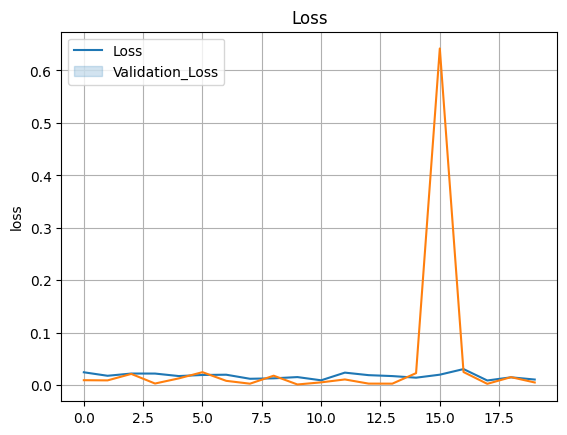

In [51]:
import seaborn as sns
sns.lineplot( x=hist_df.index, y=hist_df['loss'])
sns.lineplot( x=hist_df.index, y=hist_df['val_loss'])
plt.legend(['Loss','Validation_Loss'])
plt.title('Loss')
plt.grid()
plt.show()

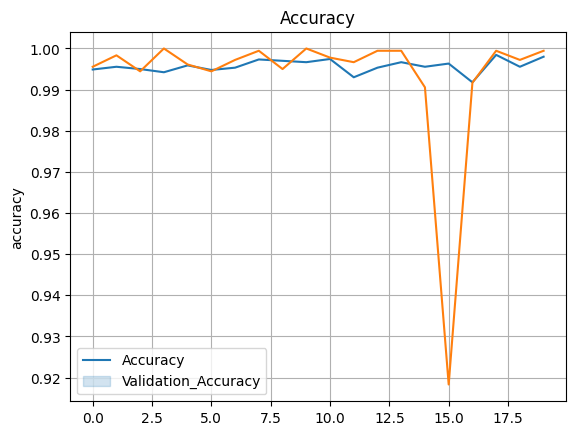

In [52]:
sns.lineplot( x=hist_df.index, y=hist_df['accuracy'])
sns.lineplot( x=hist_df.index, y=hist_df['val_accuracy'])
plt.legend(['Accuracy','Validation_Accuracy'])
plt.title('Accuracy')
plt.grid()
plt.show()

In [53]:
def view_score(score):
    for i in range(len(score)):
        print(loaded_model.metrics_names[i]+" : "+str(score[i]))
METRICS = [
                'accuracy',
                tf.keras.metrics.Recall(),
                tf.keras.metrics.AUC()
    
        ]   
loaded_model.compile(
                optimizer='Adam',
                loss='categorical_crossentropy',
                metrics=METRICS
            )
score = loaded_model.evaluate([X_train_f,X_train_x,X_train_b],y_train, verbose=0)
view_score(score)

loss : 0.004974734969437122
accuracy : 0.9994444251060486
recall : 0.9994444251060486
auc : 0.9997074604034424


In [54]:
classes = ['Acceptable', 'Hateful']
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
def pred(X,Y):
    yhat = loaded_model.predict(X)
    yhat = enc.inverse_transform(yhat)
    y_real = enc.inverse_transform(Y)
    return y_real,yhat
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
def visualise(y_true,y_pred,name,model_name):
    ConfusionM = confusion_matrix(y_true,y_pred)

    
    #print('ROC AUC score:', 
    #multiclass_roc_auc_score(y_true,y_pred, ))
    print(classification_report(y_true,y_pred  ,target_names = classes,digits=4))
    print()
    fig, ax = plt.subplots(figsize=(16,16)) 
    import seaborn as sns
    sns.heatmap(ConfusionM, annot=True,cmap = 'Greys',xticklabels=classes, yticklabels=classes, fmt='.2f')
    plt.title('Confusion Matrix for '+model_name)
    plt.savefig('CM.jpg')
    plt.show()
from sklearn.metrics import multilabel_confusion_matrix

def classwise(yt,yp,classes,name):
    op = multilabel_confusion_matrix(yt,yp)
    classwise_score = pd.DataFrame()
    j = 0
    for i in op:
        tp,fn,fp,tn = i[0][0],i[0][1],i[1][0],i[1][1]
        acc = (tp+tn)/(tp+tn+fp+fn)
        pre = tp/(tp+fp)
        rec = tp/(tp+fn)
        f1 = 2*rec*pre / (rec +pre)
        sp = tn / (tn +fp)
        Po = (tp + tn) / (tp + tn + fp + fn)
        Pe = ((tp + fn) * (tp + fp) + (fp + tn) * (fn + tn)) / (tp + tn + fp + fn)**2
        # return dictionary
        kp = (Po - Pe) / (1 - Pe)
        classwise_score=classwise_score.append({
            'class' : classes[j],
                'TN':tn,'FP':fp,'FN':fn,'TP':tp,
                'Accuracy':acc,
                'Precision':pre,
                'Recall or Sensitivity':rec,
                'F1 Score':f1,
                'Specificity':sp
            },ignore_index=True)
        j = j + 1
    classwise_score.to_csv(name+'.csv')
    dft = classwise_score.describe()
    dft.to_csv(name+'_stats.csv')
    print(dft)
    return classwise_score
rdf = pd.DataFrame()


225/225 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

  Acceptable     1.0000    0.9991    0.9996      4556
     Hateful     0.9985    1.0000    0.9992      2644

    accuracy                         0.9994      7200
   macro avg     0.9992    0.9996    0.9994      7200
weighted avg     0.9994    0.9994    0.9994      7200




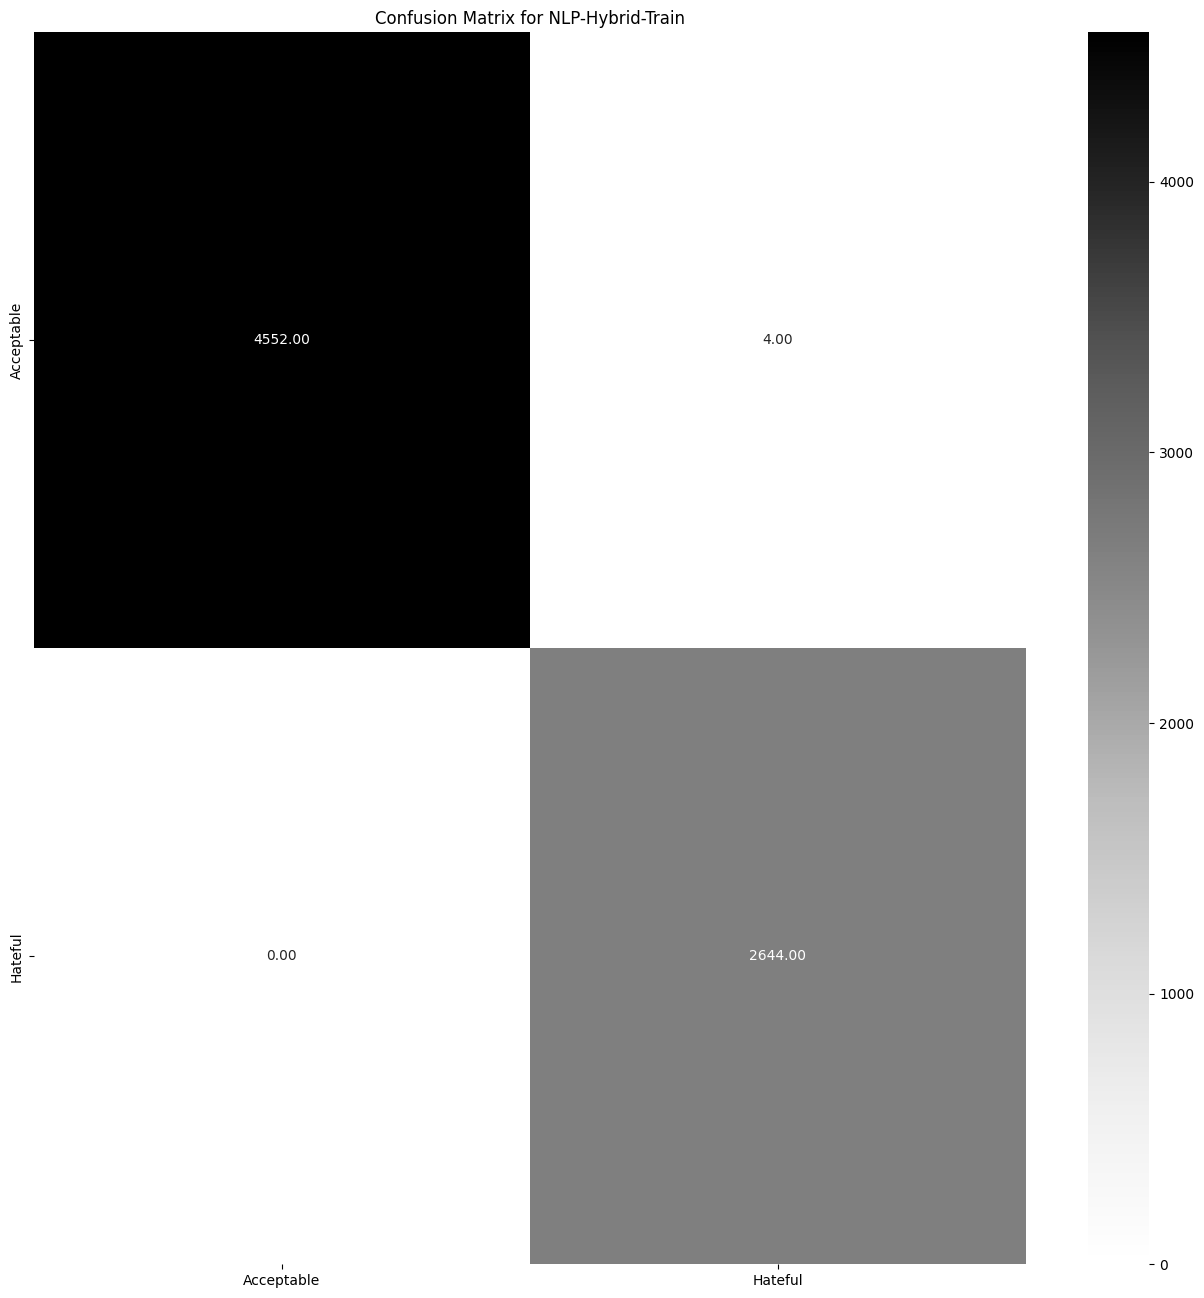

In [55]:
yt,yp = pred([X_train_f,X_train_x,X_train_b],y_train)
visualise(yt,yp,name,'NLP-Hybrid-Train')


57/57 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  Acceptable     1.0000    0.9991    0.9996      1144
     Hateful     0.9985    1.0000    0.9992       656

    accuracy                         0.9994      1800
   macro avg     0.9992    0.9996    0.9994      1800
weighted avg     0.9994    0.9994    0.9994      1800




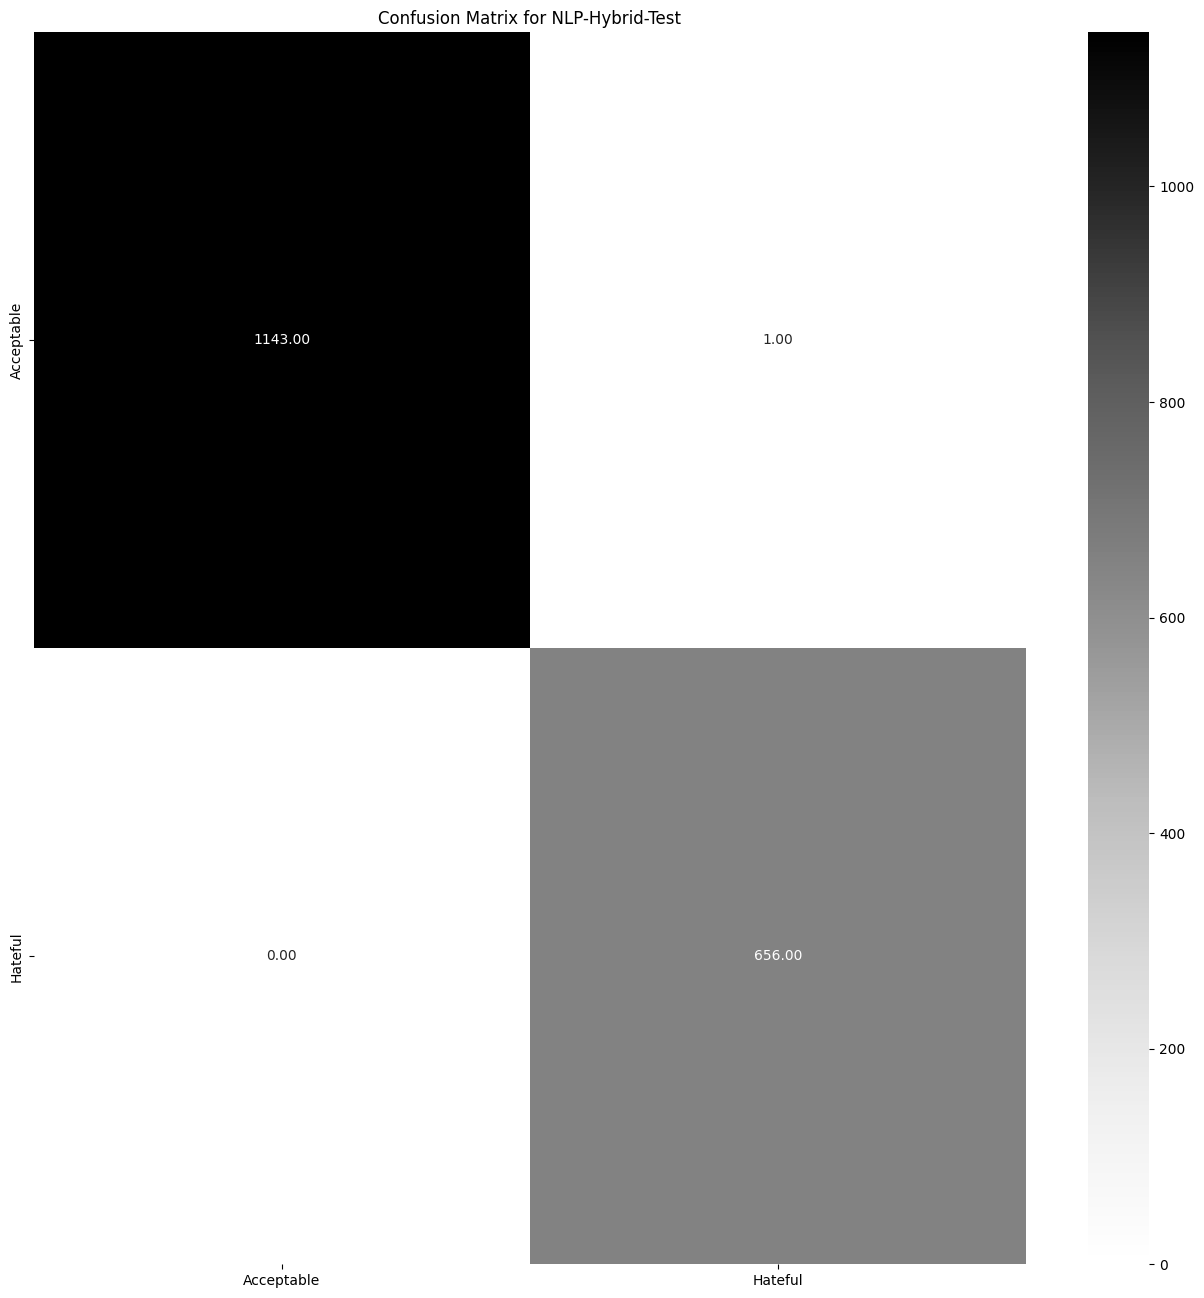

In [56]:
yt,yp = pred([X_test_f,X_test_x,X_test_b],y_test)
visualise(yt,yp,name,'NLP-Hybrid-Test')

# Cross validation

In [57]:
def onevsall(y_true,y_pred,mod):
    
    from sklearn.metrics import confusion_matrix
    global rdf
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    acc = (tp+tn)/(tp+tn+fp+fn)
    pre = tp/(tp+fp)
    rec = tp/(tp+fn)
    f1 = 2*rec*pre / (rec +pre)
    sp = tn / (tn +fp)
    new_data = {
    'Model': mod,
    'TN': tn,
    'FP': fp,
    'FN': fn,
    'TP': tp,
    'Accuracy': acc,
    'Precision': pre,
    'Recall or Sensitivity': rec,
    'F1 Score': f1,
    'Specificity': sp
    }

    # Create a new DataFrame with the new data
    new_df = pd.DataFrame(new_data, index=[0])

    # Concatenate the new DataFrame with the existing one
    rdf = pd.concat([rdf, new_df], ignore_index=True)
        
    return rdf

def roc(clf,x,y):
    import scikitplot as skplt
    import matplotlib.pyplot as plt
    skplt.metrics.plot_roc_curve(clf,x,y)
    plt.savefig('ROC'+model_name+'.jpg')
    plt.show()
    
def visualise(y_true,y_pred,name,model_name):
    ConfusionM = confusion_matrix(y_true,y_pred)

    #print('ROC AUC score:', 
    #multiclass_roc_auc_score(y_true,y_pred, ))
    print(classification_report(y_true,y_pred,   digits=4))
    print()
#     fig, ax = plt.subplots(figsize=(6,4)) 
#     import seaborn as sns
#     sns.heatmap(ConfusionM, annot=True,
#             fmt='g',xticklabels=name, yticklabels=name)
#     plt.title('Confusion Matrix for '+model_name)
#     plt.savefig('CM_'+model_name+'.jpg')
#     plt.show()
    return onevsall(y_true,y_pred,model_name)

In [58]:
from sklearn.model_selection import ShuffleSplit
from tqdm import tqdm
montecarlo_rns = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)
j = 1
montedf = pd.DataFrame()
for a, b in tqdm(montecarlo_rns.split(X_test_f)):
    X_t = [X_test_f[a],X_test_x[a], X_test_b[a]]
    Y_t = y_test[a]
    
    rdf = pd.DataFrame()
    k= 0
    yt,yp = pred(X_t,Y_t)
    onevsall(yt,yp,'Hybrid Lingusitic Model')
    k = k + 1
    rdf['Monte_Carlo_iteration']='Iteration_'+str(j)
    montedf = pd.concat([montedf,rdf])
    j = j + 1

0it [00:00, ?it/s]

45/45 [==============================] - 0s 2ms/step


1it [00:00,  3.78it/s]

45/45 [==============================] - 0s 2ms/step


2it [00:00,  4.33it/s]

45/45 [==============================] - 0s 2ms/step


3it [00:00,  4.70it/s]

45/45 [==============================] - 0s 2ms/step


4it [00:01,  2.11it/s]

45/45 [==============================] - 0s 2ms/step


5it [00:01,  2.68it/s]

45/45 [==============================] - 0s 2ms/step


6it [00:01,  3.21it/s]

45/45 [==============================] - 0s 2ms/step


7it [00:02,  3.65it/s]

45/45 [==============================] - 0s 2ms/step


8it [00:02,  4.02it/s]

45/45 [==============================] - 0s 2ms/step


9it [00:02,  4.23it/s]

45/45 [==============================] - 0s 2ms/step


10it [00:02,  3.66it/s]


In [59]:
print(montedf.shape)
montedf

(10, 11)


,Model,TN,FP,FN,TP,Accuracy,Precision,Recall or Sensitivity,F1 Score,Specificity,Monte_Carlo_iteration
0,Hybrid Lingusitic Model,903,1,0,536,0.999306,0.998138,1.0,0.999068,0.998894,Iteration_1
0,Hybrid Lingusitic Model,922,1,0,517,0.999306,0.998069,1.0,0.999034,0.998917,Iteration_2
0,Hybrid Lingusitic Model,910,0,0,530,1.000000,1.000000,1.0,1.000000,1.000000,Iteration_3
0,Hybrid Lingusitic Model,920,0,0,520,1.000000,1.000000,1.0,1.000000,1.000000,Iteration_4
0,Hybrid Lingusitic Model,924,1,0,515,0.999306,0.998062,1.0,0.999030,0.998919,Iteration_5
0,Hybrid Lingusitic Model,905,1,0,534,0.999306,0.998131,1.0,0.999065,0.998896,Iteration_6
0,Hybrid Lingusitic Model,916,0,0,524,1.000000,1.000000,1.0,1.000000,1.000000,Iteration_7
0,Hybrid Lingusitic Model,905,1,0,534,0.999306,0.998131,1.0,0.999065,0.998896,Iteration_8
0,Hybrid Lingusitic Model,918,0,0,522,1.000000,1.000000,1.0,1.000000,1.000000,Iteration_9
0,Hybrid Lingusitic Model,916,1,0,523,0.999306,0.998092,1.0,0.999045,0.998909,Iteration_10


In [60]:
montedf.to_csv('CV_hybridLiguistic.csv', index = False)

In [61]:
!zip -r OP.zip ./

  adding: .virtual_documents/ (stored 0%)
  adding: model.png (deflated 17%)
  adding: Model_CB256.csv (deflated 58%)
  adding: checkpoint (deflated 34%)
  adding: .index (deflated 73%)
  adding: Model_CB256.json (deflated 92%)
  adding: Fex_merger_org.npy (deflated 8%)
  adding: CV_hybridLiguistic.csv (deflated 68%)
  adding: .data-00000-of-00001 (deflated 13%)
  adding: Model_CB256.h5 (deflated 8%)
  adding: CM.jpg (deflated 75%)
